The notebook was run on Google Colab.

# Getting the dataset

In [1]:
!sudo apt-get update -y
!sudo apt-get install python3.9 python3.9-venv python3.9-dev -y


Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 https://cli.github.com/packages stable InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,811 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,336 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,275 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hi

In [2]:
!python3.9 -m venv py39


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

# Change directory to your project folder
project_path = "/content/drive/My Drive/Land-Cover-Semantic-Segmentation-PyTorch-main"
os.chdir(project_path)

# Check files
os.listdir()


['landcoverai.zip',
 'Dockerfile',
 'requirements.txt',
 'LICENSE',
 '.gitignore',
 '.DS_Store',
 'src',
 'notebooks',
 'assets',
 'config',
 'output',
 '.venv',
 'models',
 'data',
 'logs',
 '.github',
 'py39',
 'kaggle.json']

In [6]:

!sudo apt-get update -y
!sudo apt-get install python3.9 python3.9-venv python3.9-dev -y

# 2️⃣ Create a clean Python 3.9 virtual environment
!python3.9 -m venv /content/py39

# 3️⃣ Activate and upgrade pip inside it
!source /content/py39/bin/activate && pip install --upgrade pip setuptools wheel

# 4️⃣ Install all your dependencies from requirements.txt
!source /content/py39/bin/activate && pip install -r requirements.txt


Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [7]:
!pip install patchify

  Using cached patchify-0.2.3-py3-none-any.whl.metadata (3.0 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
Using cached patchify-0.2.3-py3-none-any.whl (6.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 65.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.

In [1]:
! pip install -q kaggle

In [2]:
# upload the .json file for your kaggle profile credentials
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"srikanthakkaru","key":"68c10d1c457ecd877c619a1dab2044eb"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# ! kaggle datasets list

In [6]:
! kaggle datasets download -d adrianboguszewski/landcoverai

Dataset URL: https://www.kaggle.com/datasets/adrianboguszewski/landcoverai
License(s): CC-BY-NC-SA-4.0
100% 1.43G/1.43G [00:59<00:00, 227MB/s]
100% 1.43G/1.43G [00:59<00:00, 25.8MB/s]


In [7]:
# ! rm -rf landcoverai

In [8]:
! mkdir data
! unzip landcoverai.zip -d data

Archive:  landcoverai.zip
  inflating: data/images/M-33-20-D-c-4-2.tif  
  inflating: data/images/M-33-20-D-d-3-3.tif  
  inflating: data/images/M-33-32-B-b-4-4.tif  
  inflating: data/images/M-33-48-A-c-4-4.tif  
  inflating: data/images/M-33-7-A-d-2-3.tif  
  inflating: data/images/M-33-7-A-d-3-2.tif  
  inflating: data/images/M-34-32-B-a-4-3.tif  
  inflating: data/images/M-34-32-B-b-1-3.tif  
  inflating: data/images/M-34-5-D-d-4-2.tif  
  inflating: data/images/M-34-51-C-b-2-1.tif  
  inflating: data/images/M-34-51-C-d-4-1.tif  
  inflating: data/images/M-34-55-B-b-4-1.tif  
  inflating: data/images/M-34-56-A-b-1-4.tif  
  inflating: data/images/M-34-6-A-d-2-2.tif  
  inflating: data/images/M-34-65-D-a-4-4.tif  
  inflating: data/images/M-34-65-D-c-4-2.tif  
  inflating: data/images/M-34-65-D-d-4-1.tif  
  inflating: data/images/M-34-68-B-a-1-3.tif  
  inflating: data/images/M-34-77-B-c-2-3.tif  
  inflating: data/images/N-33-104-A-c-1-1.tif  
  inflating: data/images/N-33-119-C-c

# Visualizing the dataset

Image and Mask filename: M-33-20-D-c-4-2.tif

Image shape: (9636, 9095, 3)



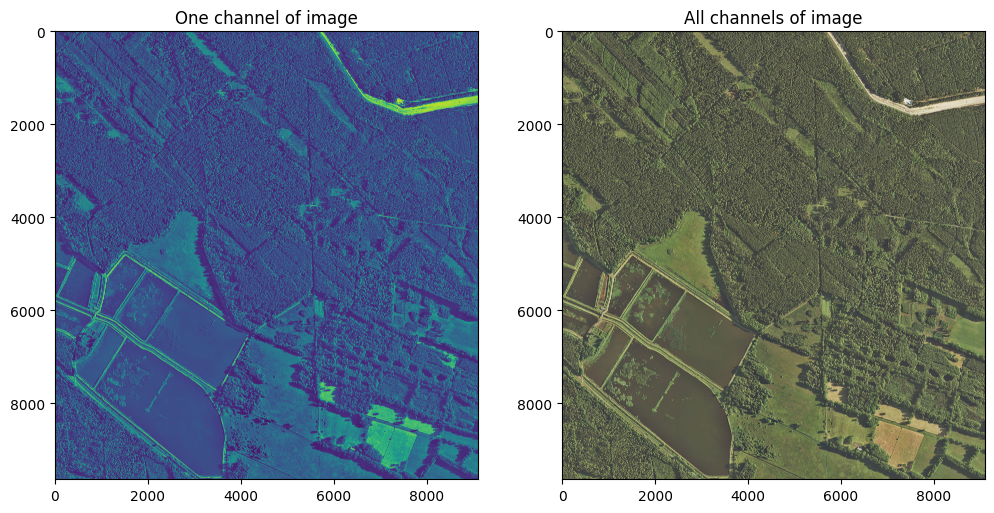


Mask shape: (9636, 9095)

Classes are:  [0 1 2 3 4]  and the counts are:  [18008335    46512 59476087  9553859   554627]



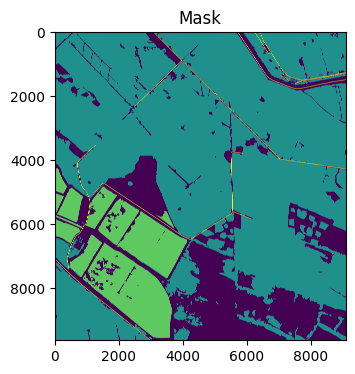

In [9]:
# Visualizing the dataset
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("Image and Mask filename: M-33-20-D-c-4-2.tif")
print()
temp_img = cv2.imread("data/images/M-33-20-D-c-4-2.tif", 1) # 3 channels / spectral bands
temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)
print("Image shape:", temp_img.shape)
print()

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(temp_img[:,:,0])
plt.title("One channel of image")
plt.subplot(122)
plt.imshow(temp_img)
plt.title("All channels of image")
plt.show()
print()

temp_mask = cv2.imread("data/masks/M-33-20-D-c-4-2.tif") # 3 channels but all same. Can also read with cv2.imread(path, 0) to get only one channel.
print("Mask shape:", temp_mask[:,:,0].shape)
print()
classes, count = np.unique(temp_mask[:,:,0], return_counts=True) # Visualize only one channel. All chanels are identical.
print("Classes are: ", classes, " and the counts are: ", count)
print()

plt.figure(figsize=(6, 4))
plt.imshow(temp_mask[:,:,0])
plt.title("Mask")
plt.show()
print()

# Model Training

In [10]:
# Patching the images
from patchify import patchify
from PIL import Image

root_directory = "data"

img_dir = os.path.join(root_directory, "images")
mask_dir = os.path.join(root_directory, "masks")

patch_size = 512

patches_img_dir = os.path.join(f"patches_{patch_size}", "images")
patches_img_dir = os.path.join(root_directory, patches_img_dir)
os.makedirs(patches_img_dir, exist_ok=True)
patches_mask_dir = os.path.join(f"patches_{patch_size}", "masks")
patches_mask_dir = os.path.join(root_directory, patches_mask_dir)
os.makedirs(patches_mask_dir, exist_ok=True)


def patching(data_dir, patches_dir, patch_size):
  for filename in os.listdir(data_dir):
    if filename.endswith('.tif'):
      img = cv2.imread(os.path.join(data_dir, filename), 1)
      max_height = (img.shape[0] // patch_size) * patch_size
      max_width = (img.shape[1] // patch_size) * patch_size
      img = img[0:max_height, 0:max_width]
      print(f"Patchifying {filename}...")
      patches = patchify(img, (patch_size, patch_size, 3), step = patch_size)  # non-overlapping
      print("Patches shape:", patches.shape)
      for i in range(patches.shape[0]):
        for j in range(patches.shape[1]):
          single_patch = patches[i, j, 0, :, :] # the 0 is an extra unncessary dimension added by patchify for multiple channels scenario
          cv2.imwrite(os.path.join(patches_dir, filename.replace(".tif", f"_patch_{i}_{j}.tif")), single_patch)

print()
print("Dividing images into patches...")
patching(img_dir, patches_img_dir, patch_size)
print("Dividing images into patches completed successfull!")

print()
print("Dividing masks into patches...")
patching(mask_dir, patches_mask_dir, patch_size)
print("Dividing masks into patches completed successfull!")


Dividing images into patches...
Patchifying N-34-66-C-c-4-3.tif...
Patches shape: (9, 8, 1, 512, 512, 3)
Patchifying N-33-60-D-d-1-2.tif...
Patches shape: (9, 8, 1, 512, 512, 3)
Patchifying M-33-20-D-d-3-3.tif...
Patches shape: (18, 17, 1, 512, 512, 3)
Patchifying N-33-139-C-d-2-2.tif...
Patches shape: (18, 17, 1, 512, 512, 3)
Patchifying M-34-51-C-b-2-1.tif...
Patches shape: (18, 17, 1, 512, 512, 3)
Patchifying N-33-119-C-c-3-3.tif...
Patches shape: (9, 8, 1, 512, 512, 3)
Patchifying N-34-77-A-b-1-4.tif...
Patches shape: (18, 16, 1, 512, 512, 3)
Patchifying N-33-130-A-d-3-3.tif...
Patches shape: (18, 17, 1, 512, 512, 3)
Patchifying M-34-51-C-d-4-1.tif...
Patches shape: (18, 17, 1, 512, 512, 3)
Patchifying N-33-139-D-c-1-3.tif...
Patches shape: (18, 17, 1, 512, 512, 3)
Patchifying M-33-20-D-c-4-2.tif...
Patches shape: (18, 17, 1, 512, 512, 3)
Patchifying N-34-97-D-c-2-4.tif...
Patches shape: (9, 8, 1, 512, 512, 3)
Patchifying M-34-77-B-c-2-3.tif...
Patches shape: (18, 17, 1, 512, 512,

In [11]:
print(len(os.listdir(patches_img_dir)))
print(len(os.listdir(patches_mask_dir)))

10674
10674


In [12]:
def discard_useless_patches(patches_img_dir, patches_mask_dir):
  for filename in os.listdir(patches_mask_dir):
    img_path = os.path.join(patches_img_dir, filename)
    mask_path = os.path.join(patches_mask_dir, filename)
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    classes, count = np.unique(mask, return_counts = True)
    # If background class occupies more than 95% of the image, discard the image and mask
    if (count[0] / count.sum()) > 0.95:
      os.remove(img_path)
      os.remove(mask_path)

discard_useless_patches(patches_img_dir, patches_mask_dir)

In [13]:
print(len(os.listdir(patches_img_dir)))
print(len(os.listdir(patches_mask_dir)))

7053
7053


In [16]:
!pip install split-folders


  Using cached split_folders-0.5.1-py3-none-any.whl.metadata (6.2 kB)
Using cached split_folders-0.5.1-py3-none-any.whl (8.4 kB)


In [17]:
import splitfolders  # or import split_folders

input_folder = patches_img_dir.strip("images")
print(input_folder)
output_folder = os.path.join(root_directory, "train_val_test")
print(output_folder)

os.makedirs(output_folder, exist_ok=True)

# Split with a ratio.
# To split into training, validation, and testing set, set a tuple to `ratio`, i.e, `(.8, .1, .1)`.
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .2), group_prefix=None, move=False) # splitting in training and validation only

train_dir = os.path.join(output_folder, "train")
val_dir = os.path.join(output_folder, "val")
# test_dir = os.path.join(output_folder, "test")

data/patches_512/
data/train_val_test


Copying files: 14106 files [00:26, 523.77 files/s] 


In [18]:
x_train_dir = os.path.join(train_dir, "images")
y_train_dir = os.path.join(train_dir, "masks")

x_val_dir = os.path.join(val_dir, "images")
y_val_dir = os.path.join(val_dir, "masks")

In [19]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

In [20]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

class SegmentationDataset(Dataset):

    """
    landcover.ai dataset. Read images, apply augmentation and preprocessing transformations.

    Args:
        images_dir (str): path to images folder
        masks_dir (str): path to segmentation masks folder
        class_values (list): values of classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing
            (e.g. noralization, shape manipulation, etc.)
    """

    CLASSES = ['background', 'building', 'woodland', 'water', 'road']

    def __init__(
            self,
            images_dir,
            masks_dir,
            classes=None,
            augmentation=None,
            preprocessing=None,
    ):
        self.ids = os.listdir(images_dir)
        self.images = [os.path.join(images_dir, image_id) for image_id in self.ids]
        self.masks = [os.path.join(masks_dir, image_id) for image_id in self.ids]

        # convert str names to class values on masks
        self.class_values = [self.CLASSES.index(cls.lower()) for cls in classes]

        self.augmentation = augmentation
        self.preprocessing = preprocessing

    def __getitem__(self, i):

        # read data
        image = cv2.imread(self.images[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image / 255
        mask = cv2.imread(self.masks[i], 0)

        # extract certain classes from mask (e.g. cars)
        masks = [(mask == v) for v in self.class_values]
        mask = np.stack(masks, axis=-1).astype('float')

        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        return image, mask

    def __len__(self):
        return len(self.ids)

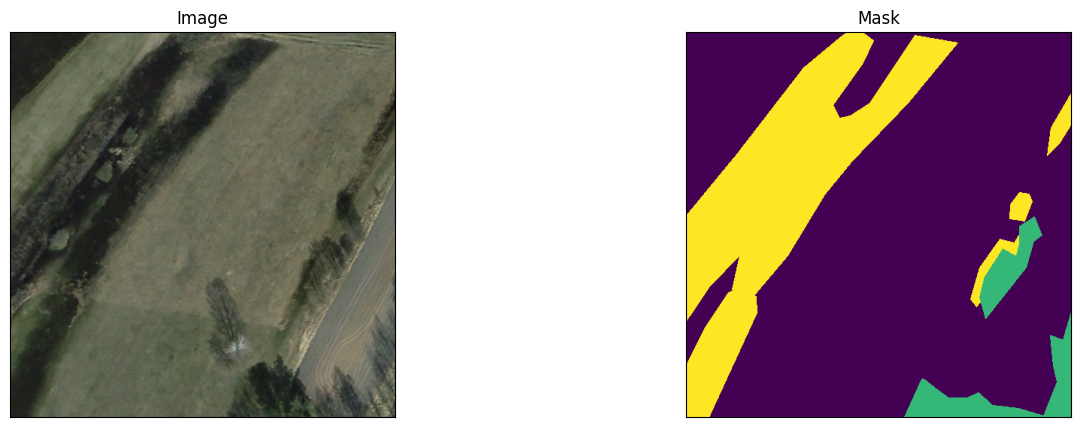

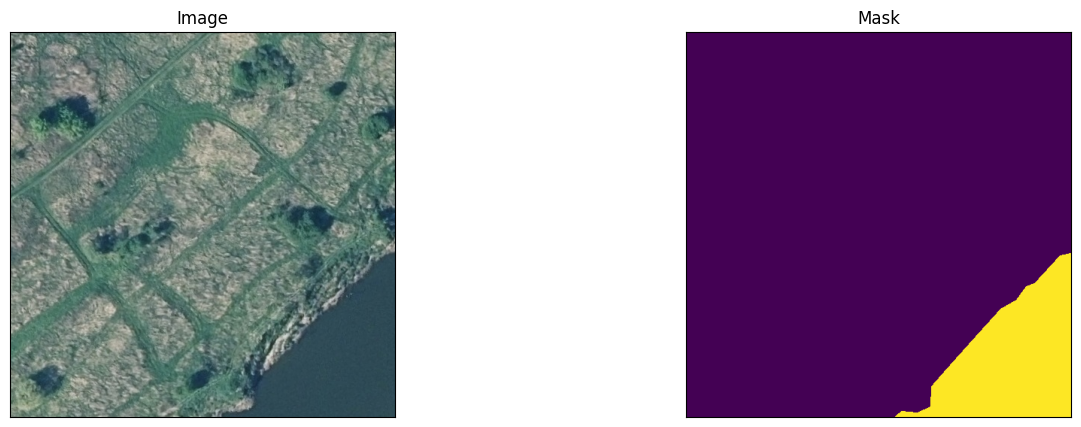

In [21]:
# Visualizing all classes in the mask
dataset = SegmentationDataset(x_train_dir, y_train_dir, classes=['background', 'building', 'woodland', 'water', 'road'])
image, mask = dataset[4] # get some sample
visualize(
    image = image,
    # Convert the predicted one-hot encoded mask back to normal
    mask = np.argmax(mask, axis=2)
)

# Visualizing selected classes in the mask
dataset = SegmentationDataset(x_train_dir, y_train_dir, classes=['background', 'water', 'woodland'])
image, mask = dataset[16] # get some sample
visualize(
    image = image,
    # Convert the predicted one-hot encoded mask back to normal
    mask = np.argmax(mask, axis=2)
)

In [22]:
import albumentations as album

def get_training_augmentation():
    train_transform = [
        album.HorizontalFlip(p=0.5),
        album.VerticalFlip(p=0.5),
        # album.ShiftScaleRotate(scale_limit=1.5, rotate_limit=45, shift_limit=0.1, p=1, border_mode=0),
        # album.GaussNoise(p=0.2),
        # album.Perspective(p=0.5),
        # album.OneOf(
        #     [
        #         album.CLAHE(p=1),
        #         album.RandomBrightnessContrast(p=1),
        #         album.RandomGamma(p=1),
        #     ],
        #     p=0.9,
        # ),
        # album.OneOf(
        #     [
        #         album.Sharpen(p=1),
        #         album.Blur(blur_limit=3, p=1),
        #         album.MotionBlur(blur_limit=3, p=1),
        #     ],
        #     p=0.9,
        # ),
    ]
    return album.Compose(train_transform)


def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')


def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform

    Args:
        preprocessing_fn (callbale): data normalization function
            (can be specific for each pretrained neural network)
    Return:
        transform: albummentations.Compose

    """
    _transform = [
        album.Lambda(image=preprocessing_fn),
        album.Lambda(image=to_tensor, mask=to_tensor),
    ]
    return album.Compose(_transform)

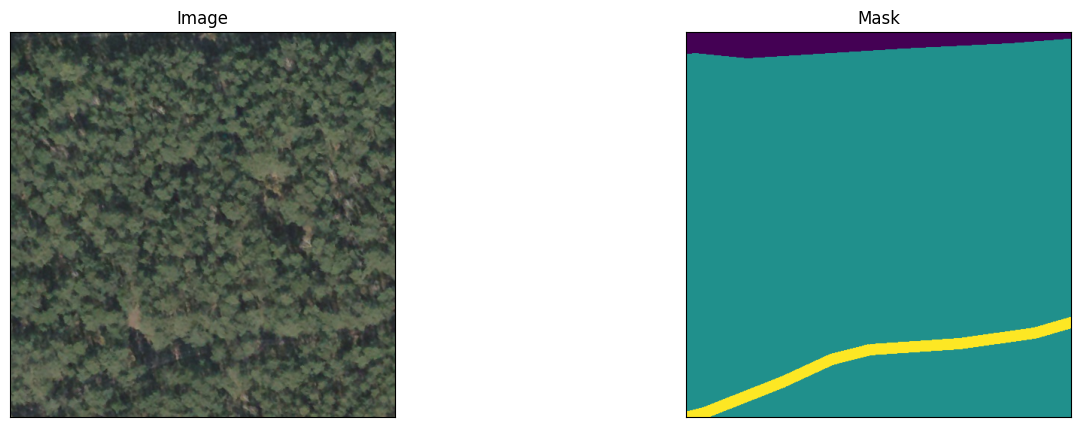

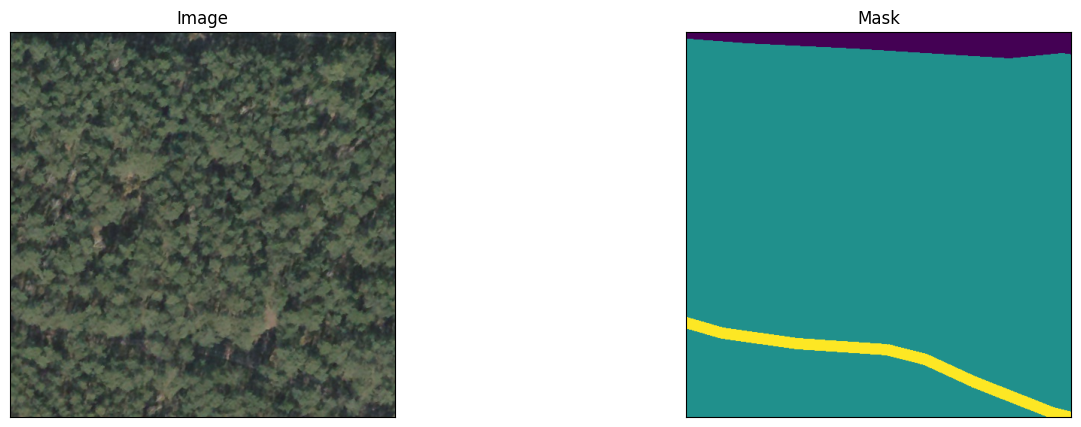

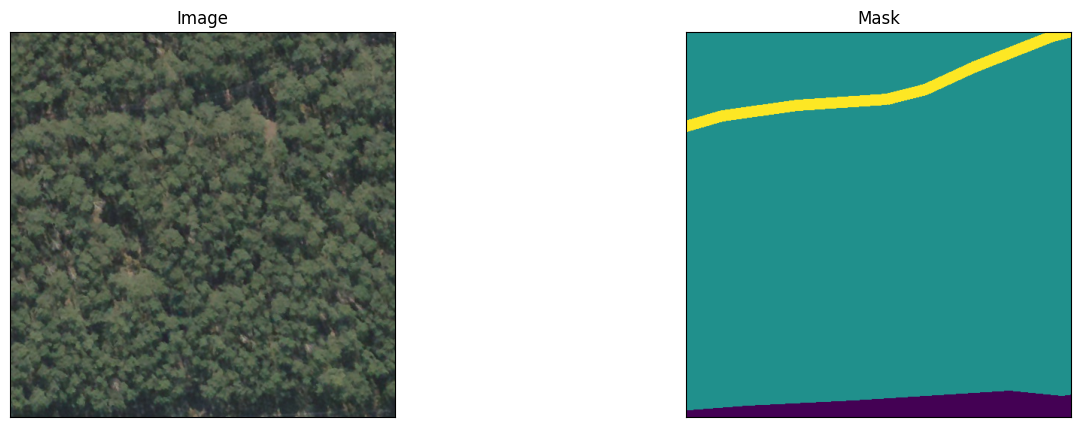

In [23]:
# Visualize resulted augmented images and masks

augmented_dataset = SegmentationDataset(
    x_train_dir,
    y_train_dir,
    augmentation=get_training_augmentation(),
    classes=['background', 'building', 'woodland', 'water', 'road'],
)

# Same image with different random transforms
for i in range(3):
    image, mask = augmented_dataset[5123]
    visualize(image=image, mask=np.argmax(mask, axis=2))

In [25]:
!pip install segmentation-models-pytorch timm torchvision --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 5.2 MB/s eta 0:00:00


In [26]:
import torch
import segmentation_models_pytorch as smp
import segmentation_models_pytorch.utils

BATCH_SIZE = 16
ENCODER = 'efficientnet-b0'
ENCODER_WEIGHTS = 'imagenet'
CLASSES = ['background', 'building', 'woodland', 'water']   # not training on 'road' class since it's instances in the data is too less
ACTIVATION = 'softmax2d'    # could be None for logits or 'softmax2d' for multiclass segmentation
DEVICE = 'cuda'
EPOCHS = 50

# create segmentation model with pretrained encoder
model = smp.Unet(
    encoder_name=ENCODER,
    encoder_weights=ENCODER_WEIGHTS,
    classes=len(CLASSES),
    activation=ACTIVATION,
)

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/106 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

In [27]:
train_dataset = SegmentationDataset(
    x_train_dir,
    y_train_dir,
    augmentation=get_training_augmentation(),
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

val_dataset = SegmentationDataset(
    x_val_dir,
    y_val_dir,
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

In [28]:
# Dice/F1 score - https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient
# IoU/Jaccard score - https://en.wikipedia.org/wiki/Jaccard_index

loss = smp.utils.losses.DiceLoss()
metrics = [
    smp.utils.metrics.IoU(threshold=0.5)
]

optimizer = torch.optim.Adam([
    dict(params=model.parameters(), lr=0.0003),
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

In [29]:
# create epoch runners
# it is a simple loop of iterating over dataloader`s samples
train_epoch = smp.utils.train.TrainEpoch(
    model,
    loss=loss,
    metrics=metrics,
    optimizer=optimizer,
    device=DEVICE,
    verbose=True,
)

valid_epoch = smp.utils.train.ValidEpoch(
    model,
    loss=loss,
    metrics=metrics,
    device=DEVICE,
    verbose=True,
)

In [ ]:
max_score = 0

for i in range(0, EPOCHS):

    print('\nEpoch: {}'.format(i))
    train_logs = train_epoch.run(train_loader)
    valid_logs = valid_epoch.run(valid_loader)

    # Do something (save model, change lr, etc.)
    if max_score < valid_logs['iou_score']:
        max_score = valid_logs['iou_score']
        torch.save(model, f'/content/drive/MyDrive/Colab Notebooks/Personal_Projects/Image Segmentation/Landcover Semantic Segmentation/landcover_unet_{ENCODER}_epochs{i}_patch{patch_size}_batch{BATCH_SIZE}.pth')
        print('Model saved!')

    scheduler.step(valid_logs['dice_loss'])


Epoch: 0
train:   4%|▍         | 15/353 [00:22<07:45,  1.38s/it, dice_loss - 0.6334, iou_score - 0.2159]